In [199]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [200]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [201]:
from tensorflow import keras
keras.__version__

'2.3.0-tf'

# Perceptrons
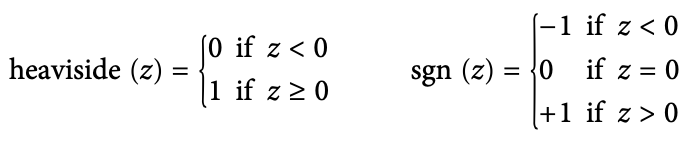  
\begin{align*}
z &= {w}_1 {x}_1 + {w}_2 {x}_2 + ⋯ + {w}_n {x}_n = x⊺ w
\end{align*}  
<br>
computes a weighted sum of its inputs then applies a step function.  
#### Step function  
1. __Heaviside step function__  
2. __sign function__  
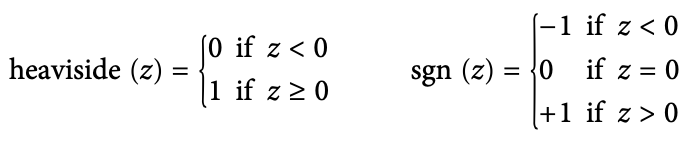

Single threshold logic unit(TLU) can be used for simple linear binary classification.  
For example, use a single TLU to classify iris flowers based on petal length and width.  그전 layer에 연결된 TLU를 fully connected layer 또는 dense layer.  
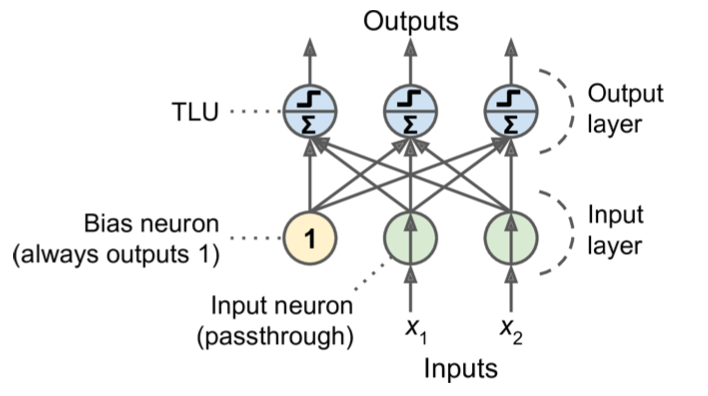  
<br>
#### Input layer  
input neurons + bias neuron   
#### Computing the outputs of a fully connected layer
\begin{align*}
{h}_{W,b}{(X)} & = ϕ(XW+b)
\end{align*}  
W = weight. 
b = bias  
function ϕ = activation function  
<br>
#### Perceptron learning rule (weight update)
\begin{align*}
w_{i,j}^{(nextstep)} =w_{i,j}+η(y_j−\hat{y}_j)x_i
\end{align*}  
η = learning rate.

In [177]:
#SCikit-Learn Perceptron class가 있다.
#  SGDClassifier에 hyperparameters: loss="perceptron", learning_rate="constant", 
#       eta0=1 (the learning rate), and penalty=None (no regularization) 쓰는것과 같다.
# Perceptrons do not output a class probability; prefer Logistic Regression over Perceptrons.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris() #load
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa? 0 = setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [140]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [141]:
y_pred

array([1])

Saving figure perceptron_iris_plot


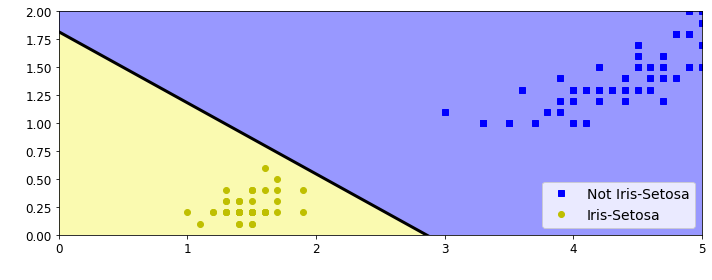

In [152]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14,color='white')
plt.ylabel("Petal width", fontsize=14,color='white')
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
    
save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [153]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

/Users/j/handsonml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


Saving figure activation_functions_plot


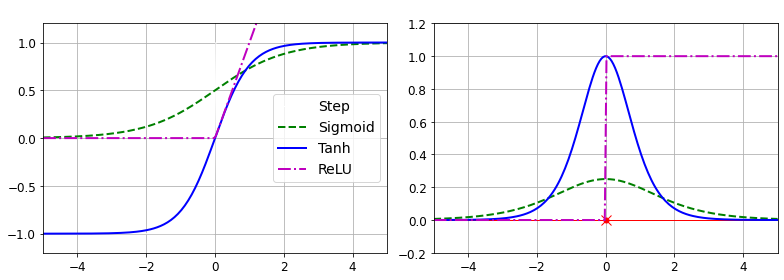

In [166]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14, color='w')
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14, color='w')
plt.axis([-5, 5, -0.2, 1.2], color='w')

save_fig("activation_functions_plot")
plt.show()

#### Why do we need Activation Functions in the first place?  
chain several linear transformations, all you get is a linear transformation.  
\begin{align*}
  f(x) &= 2x+3\\
  g(x) &= 5x-1\\
  f(g(x)) &= 2(5x-1)+3
\end{align*}

In [175]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


/Users/j/handsonml/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'color'


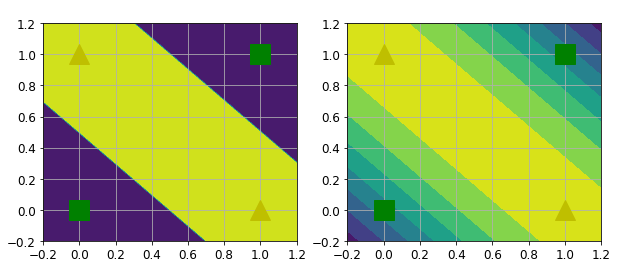

In [174]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14, color='w')
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14, color='w')
plt.grid(True)

Multilayer Perceptron (MLP)
some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. 
can solve the XOR problem

deep neural network (DNN)
 When an ANN contains a deep stack of hidden layers
 
Backpropagation training algorithm
 Gradient Descent - computing the gradients automatically
 ->autodiff(automaticdifferentiation)
 one used by backpropagation is called reverse-mode autodiff.

# Regression MLPs  
1. predict a single value  (e.g., the price of a house, given many of its features)  
just need a single output neuron.
2. __Multivariate regression__(multiple values at once)  
need one output neuron per output dimension.  
<br>
3. guarantee that the output will always be positive can use the **ReLU** or **softplus** in the output layer.  
softplus(z) = log(1 + exp(z))
4. guarantee that the predictions will fall within a given range of values  
0 to 1 for the **logistic function**.  
–1 to 1 for the **hyperbolic tangent**.  
<br>
5. loss function to use during training **mean squared error**.  
if lot of outliers in the training set, **mean absolute error** instead  
or **Huber loss**.  
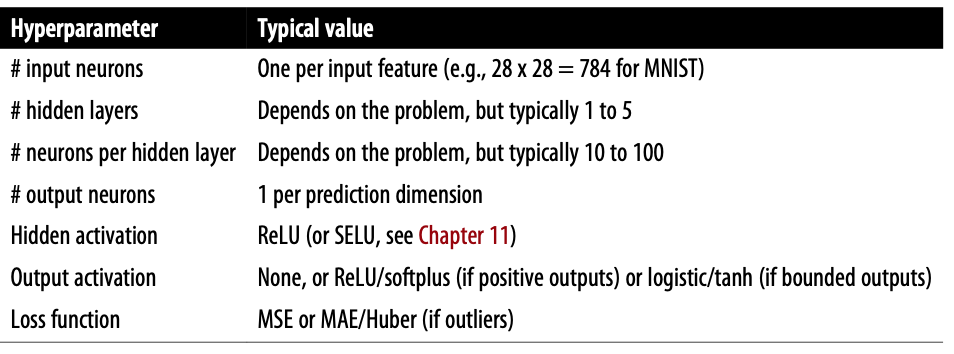

# Classification MLPs
1. Binary classification problem -> need a single output neuron, logistic activation function.
2. Multilabel binary classification -> need two output neuron, logistic activation function.  
(ham or spam,simultaneously urgent or nonurgent email).  
3. multiclass classification  
(classes 0 through 9 for digit image classification -> need to have one output neuron per class, softmax activation function)  
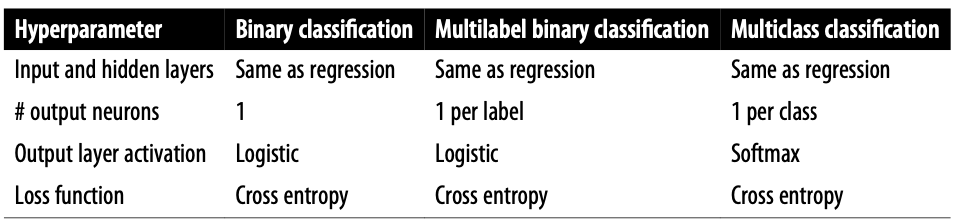



# Building an Image Classifier Using the Sequential API

Using Keras to load the dataset
------
Keras와 Scikit-Learn 다른점 
1. 모든이미지는 1D array of size 784 가아니라 28 × 28 array.
2. floats (0.0 to 255.0) 이아니라 integers (0 to 255)  

In [178]:
import tensorflow as tf
from tensorflow import keras

In [179]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [180]:
X_train_full.shape # 28x28 이 60,000개

(60000, 28, 28)

In [181]:
y_train_full.shape

(60000,)

In [182]:
X_test.shape

(10000, 28, 28)

In [184]:
X_train_full.dtype # 픽셀은 바이트 (0~255)

dtype('uint8')

In [185]:
# full traning set -> validation set 과 작은 training set 으로
# Gradient Descent을 쓸것이므로 255.0로 나누어서 0~1 scale 로 바꾸어준다. 
# 255.0 으로나누어 float 으로바뀜

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

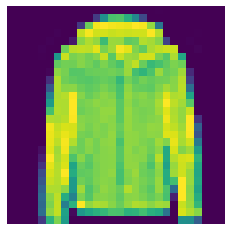

In [186]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt.imshow(X_train[0], cmap="binary")
plt.imshow(X_train[0])
plt.axis('off') #축 없애기

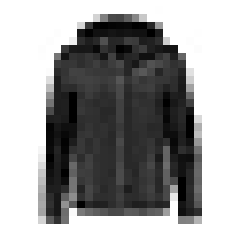

In [187]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [188]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [189]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [190]:
class_names[y_train[5]]
# 0 coat
# 1 T-shirt/top
# 2 Sneaker
# 3 Ankle boot
# 4 Ankle boot

'Ankle boot'

In [191]:
X_valid.shape

(5000, 28, 28)

In [192]:
X_test.shape

(10000, 28, 28)

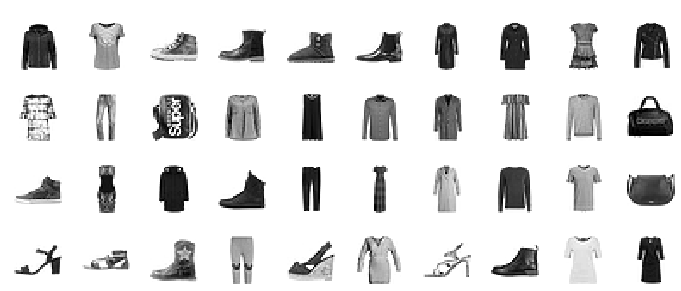

In [208]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12, color='white')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
# plt.show()

# Creating the model using the Sequential API
classification MLP 
2개의 히든레이로 구성

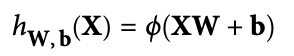

https://keras.io/api/layers/activations/

In [209]:
model = keras.models.Sequential()
# Sequential model을 만든다. Sequential API=한스택이 계속 연결되는것

model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 첫번쨰 레이어 model 에 붙여준다 Flatten layer 이미지를 1D array로 변환
# X.reshape(-1, 1) 
# keras.layers.InputLayer(input_shape=[28,28])

model.add(keras.layers.Dense(300, activation="relu"))
# ReLu activation function, 300개의 뉴런의 Dense hidden layer 
# activation="relu" 또는 activation=keras.activations.relu or activation=activations.relu.

model.add(keras.layers.Dense(100, activation="relu"))
# ReLu activation function, 100개 뉴런의 second Dense hidden layer

model.add(keras.layers.Dense(10, activation="softmax"))
# softmax activation function, 10개의 뉴런의 Dense output layer 1개의 아웃풋당 1개

In [210]:
import numpy as np

keras.backend.clear_session()
# 모델 생선전 tensorflow graph 영역 clear
np.random.seed(42)
tf.random.set_seed(42)

In [211]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [212]:
model.layers

In [213]:
model.summary()
# summary total number of parameters = trainable + non-trainable parameters
# 첫번째 layer 235,200(784x300) + 300(bias) = 235,500

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


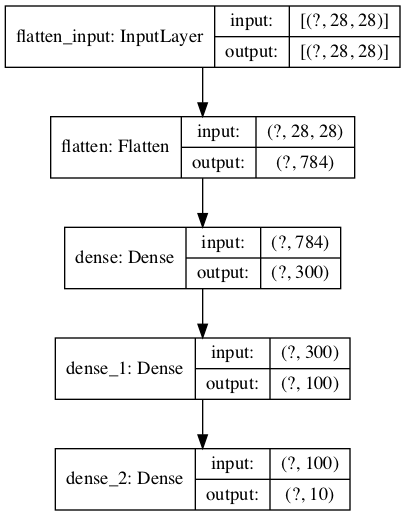

In [214]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)
#pip install pydot
#pip install graphviz
#conda install pydot-ng
#conda install graphviz

In [215]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [216]:
model.get_layer(hidden1.name) is hidden1

True

In [217]:
weights, biases = hidden1.get_weights()

In [218]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [219]:
weights.shape

(784, 300)

In [220]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [221]:
biases.shape

(300,)

In [222]:
# model 완성후 컴파일 해야한다.
# loss function and the optimizer 정한다.
# loss="sparse_categorical_crossentropy" => loss=keras.losses.sparse_categorical_crossentropy.
# optimizer="sgd" => optimizer=keras.optimizers.SGD()
# metrics=["accuracy"] => metrics=[keras.metrics.sparse_categorical_accuracy]

# binary classification이면 "softmax" 대신 "sigmoid" 그리고 "binary_crossentropy"
# optimizer=keras.optimiz ers.SGD(lr=???), optimizer="sgd" -> default lr=0.01.
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
# keras.utils.to_categorical() 
# # class to onehot
# np.argmax(, axis=1) 
# # 다시 원래대로 

In [223]:
# If the performance on the training set가 validation set 보다 월등히좋으면, 모델이 training set을 overfitting
# validation accuracy reached 89.26% after 30 epoch
# validation_data 대신 validation_split
# validation_split=0.1 Keras 데이터의 마지막 10% (before shuffling) validation에 사용.
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4843 - accuracy: 0.8317 - val_loss: 0.4350 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4392 - accuracy: 0.8456 - val_loss: 0.5355 - val_accuracy: 0.7970
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3919 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3937 - accuracy: 0.8618 - val_loss: 0.3741 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3750 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3614 - val_accuracy:

In [224]:
history.params
# 트레이닝 파라미터 보여준다. 

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [225]:
print(history.epoch)
# epoch 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [226]:
history.history.keys()
# epoch 끝마다 측정된 loss 등

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Learning curves  
#### overfitting  
If the performance on the training set is much better than on the validation set
<br><br>
#### there is not too much overfitting

performed better on the validation set than on the training set at the beginning of training 처럼보이나
<br><br>
validation error은 epoch 마지막에, train error은 중간에 측정해서 그렇게 보이는 것.  
training curve should be shifted by half an epoch to the left.
<br><br>
모델에 performance가 마음에 안들면 tune the hyperparameters
(learning rate, 다른 optimizer, model hyperparameters layers의 숫자, layer딩 neurons의 숫자,  hidden layer의 activation functions의 종류)

(0.0, 1.0)

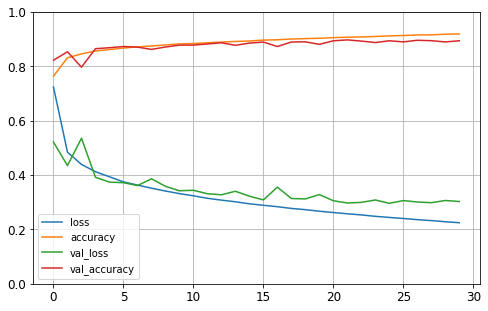

In [248]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) #그리드 보여준다 가로세로 줄
plt.gca().set_ylim(0, 1) # y축 0~1
# save_fig("keras_learning_curves_plot")
# plt.show()

 model’s validation accuracy 만족한다면 teat set 평가

In [230]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8825


[0.33723148703575134, 0.8824999928474426]

# Using the model to make predictions

In [46]:
X_new = X_test[:3] #
y_proba = model.predict(X_new)
y_proba.round(2) #소수점

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_proba

array([[5.2830833e-06, 4.0551120e-07, 1.0015368e-04, 7.7040804e-06,
        4.5156253e-06, 1.1572367e-02, 7.8302319e-06, 2.7336337e-02,
        7.9572352e-04, 9.6016967e-01],
       [1.0498511e-05, 3.3454636e-08, 9.8462242e-01, 1.3144024e-08,
        1.5008902e-02, 4.8745417e-12, 3.5810217e-04, 9.5167867e-12,
        8.9352810e-09, 2.2179291e-11],
       [2.4313726e-06, 9.9999702e-01, 2.2180652e-08, 3.6664088e-07,
        1.3489095e-07, 1.1770322e-13, 4.9101684e-10, 3.3502527e-13,
        8.7531919e-09, 1.9819489e-12]], dtype=float32)

In [50]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [51]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [52]:
y_new = y_test[:3]
y_new


array([9, 2, 1], dtype=uint8)

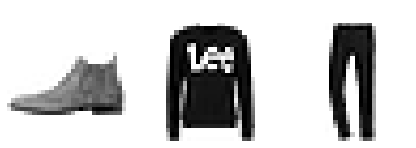

In [59]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12,color='white')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
# plt.show()

# Building a Regression MLP Using the Sequential API

In [249]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#### classification 과의 차이점  
1. output이 한개이다.

2. activation function 쓰지않고, loss function은 mean squared error.

3. dataset noisy하므로 하나의 hidden layer(fewer neurons) overfitting을 방지하기 위해


In [250]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [251]:
np.random.seed(42)
tf.random.set_seed(42)

In [252]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

In [253]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [254]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 363}

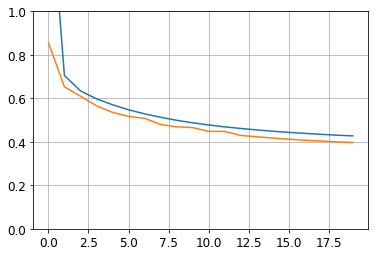

In [255]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

(0.0, 1.0)

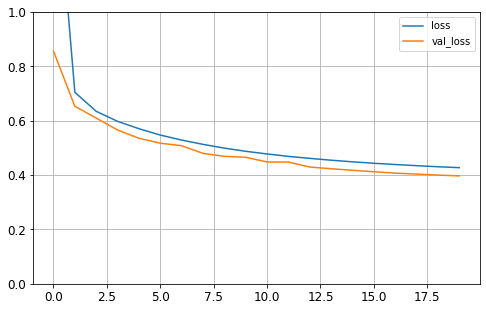

In [256]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [257]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022797 ]], dtype=float32)

# Building Complex Models Using the Functional API

#### nonsequential neural network  
1. Wide & Deep neural network  
neural network to learn both deep patterns (using the deep path) and simple rules (through the short path)
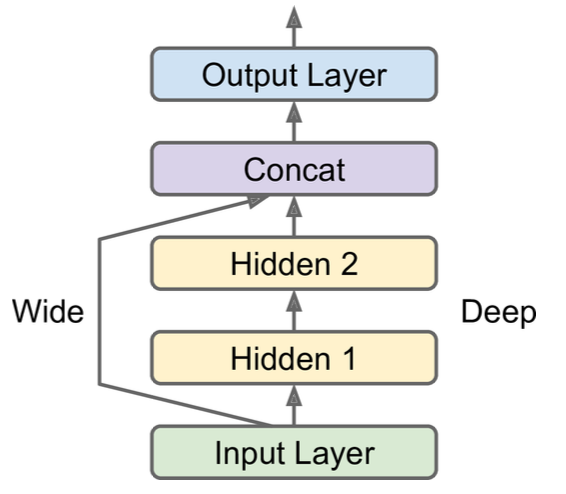

In [258]:
np.random.seed(42)
tf.random.set_seed(42)

In [259]:
X_train.shape

(11610, 8)

In [260]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
# Input object 만든다

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
#  Relu 사용 30뉴런의 Dense layer

hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 두번째 히든레어

concat = keras.layers.concatenate([input_, hidden2])
# Concatenate layer

output = keras.layers.Dense(1)(concat)
# 아웃풋레어

model = keras.models.Model(inputs=[input_], outputs=[output])
# 어떤 인풋과 아웃풋을 쓸건지



In [86]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_11[0][0]             

In [261]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4659 - val_loss: 0.4313


use multiple inputs
 five features through the wide path (features 0 to 4)
 six features through the deep path (features 2 to 7

하나의 input matrix X_train를 통과하는것이 아니라(X_train_A, X_train_B)를 통과한다.

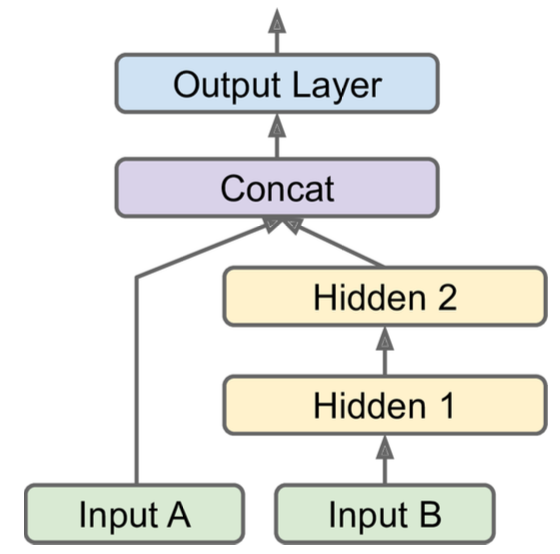

In [83]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [84]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4644 - val_loss: 0.4315

In [262]:
y_pred

array([[0.47010726],
       [1.8735046 ],
       [3.379823  ]], dtype=float32)

five features through the wide path (features 0 to 4),  
and six features through the deep path (features 2 to 7)  
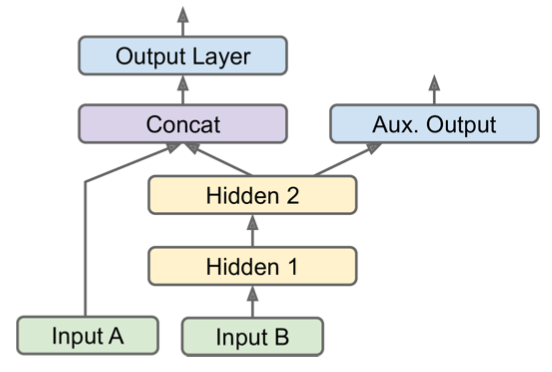

In [263]:
np.random.seed(42)
tf.random.set_seed(42)

In [264]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

# 
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [265]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [266]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [268]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# Using the Subclassing API to Build Dynamic Models
 Sequential API and the Functional API are declarative
 start by declaring which layers you want to use and how they should be connected
 
#### advantages: 
 1. model을 쉽게 save clone and share  
 
#### extra flexibility does come at a cost.  
 
 1. save 나 clone 할수없다.  
 2.  summary() - you only get a list of layers, without any information on how they are connected to each other.  
 3. keras cannot check types and shapes ahead of time

In [246]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
        # we do not need to create the inputs
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [104]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.2680 - output_1_loss: 1.9510 - output_2_loss: 5.1214 - val_loss: 2.7346 - val_output_1_loss: 2.1457 - val_output_2_loss: 8.0346
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.0709 - output_1_loss: 0.8465 - output_2_loss: 3.0910 - val_loss: 1.5914 - val_output_1_loss: 0.8960 - val_output_2_loss: 7.8500
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8526 - output_1_loss: 0.7034 - output_2_loss: 2.1957 - val_loss: 1.2902 - val_output_1_loss: 0.6649 - val_output_2_loss: 6.9176
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7558 - output_1_loss: 0.6404 - output_2_loss: 1.7942 - val_loss: 1.1200 - val_output_1_loss: 0.6066 - val_output_2_loss: 5.7407
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6982 - output_1_loss: 0.5992 - output_2_loss: 1.5896 - val_loss: 0.9833 - val_output_1_loss: 0.5615 - val_ou

In [102]:
model = WideAndDeepModel(30, activation="relu")

In [105]:
model.summary()

Model: "wide_and_deep_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             multiple                  210       
_________________________________________________________________
dense_28 (Dense)             multiple                  930       
_________________________________________________________________
dense_29 (Dense)             multiple                  36        
_________________________________________________________________
dense_30 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


# Saving and Restoring
Sequential API, Functional API 사용시 trained Keras model 저장하기  
<br><br>
Keras will use the HDF5 format to save both the model’s architecture  
and the values of all the model parameters for every layer  
also saves the optimizer .

In [269]:
np.random.seed(42)
tf.random.set_seed(42)

In [270]:
model = keras.models.Sequential([    # or keras.Model([...])
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [271]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [272]:
model.save("my_keras_model.h5")

In [273]:
model = keras.models.load_model("my_keras_model.h5")

In [274]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [275]:
model.save_weights("my_keras_weights.ckpt")

In [276]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training¶
training 몇시간걸릴떄? 큰 데이터셋 training 할때 model at the end of training때 저장, 그리고 training 기간 동안 checkpoint 저장,   
#### to avoid losing everything if your computer crashes.

In [277]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [278]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [279]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
#checkpoint
# save_best_only=True when creating the ModelCheckpoint.
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])    #
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [280]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
#early_stopping
# no progress on the validation set for
# optionally roll back to the best model
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_lo

In [281]:
# If you need extra control, you can easily write your own custom callbacks
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [282]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

360/363 [============================>.] - ETA: 0s - loss: 0.3297
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3556


# Using TensorBoard for Visualization
이코드 실행하면 TensorBoard() callback 이 알아서log directory생성 해준다.
one directory per run

 defining the root log directory

In [231]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [232]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_05_30-14_56_49'

In [123]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [124]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

start the TensorBoard server

터미널에서도 가능
$ tensorboard --logdir=./my_logs --port=6006
TensorBoard 2.0.0 at http://mycomputer.local:6006/

http://localhost:6006.

SCALARS tab에서 learning curves 볼수있다.

왼쪽아래, 시각화 원하는 logs 선택.



In [126]:
%load_ext tensorboard    # loads the TensorBoard extension
%tensorboard --logdir=./my_logs --port=6006    #starts a TensorBoard server on port 6006

In [132]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_05_23-11_51_54'

In [133]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [134]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [135]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3423 - val_l

In [131]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Fine-Tuning Neural Network Hyperparameters  
  
  
How do you know what combination of hyperparameters is the best for your task?  
1.simply try many combinations of hyperparameters and see which one works best on the validation set.  
(GridSearchCV or RandomizedSearchCV)  
2.

In [283]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [284]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [285]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [286]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_l

In [287]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3409


In [288]:
y_pred = keras_reg.predict(X_new)

In [289]:
np.random.seed(42)
tf.random.set_seed(42)

##### we want to train hundreds of variants and see which one performs best on the validation set.  


In [295]:
# exploration may last many hours, 
# depending on the hardware, the size of the dataset, 
# the complexity of the model, and the values of n_iter and cv

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 3.3520 - val_loss: 4.4563
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4974 - val_loss: 3.1074
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1100 - val_loss: 1.6834
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9274 - val_loss: 1.0210
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8229 - val_loss: 0.7946
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7590 - val_loss: 0.7180
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7177 - val_loss: 0.6944
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6893 - val_loss: 0.6736
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6675 - val_loss: 0.6516
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6490 - val_loss: 0.6364
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.5s remaining:    0.0s


242/242 [==============================] - 1s 3ms/step - loss: 3.3823 - val_loss: 5.4433
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4508 - val_loss: 7.1226
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0963 - val_loss: 6.2038
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9252 - val_loss: 5.1899
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8177 - val_loss: 4.2648
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7491 - val_loss: 3.5610
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7041 - val_loss: 2.9506
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6724 - val_loss: 2.4059
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6483 - val_loss: 2.0150
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6283 - val_loss: 1.7037
E

242/242 [==============================] - 0s 2ms/step - loss: 0.4636 - val_loss: 0.4501
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4588 - val_loss: 0.4457
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4543 - val_loss: 0.4383
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4506 - val_loss: 0.4419
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4468 - val_loss: 0.4435
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4435 - val_loss: 0.4356
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4404 - val_loss: 0.4393
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4374 - val_loss: 0.4341
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4348 - val_loss: 0.4290
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4322 - val_loss: 

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 3.1701 - val_loss: 10.4915
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1445 - val_loss: 8.4356
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8441 - val_loss: 4.5418
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7477 - val_loss: 2.1160
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6982 - val_loss: 0.9668
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6637 - val_loss: 0.6130
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6359 - val_loss: 0.7181
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6123 - val_loss: 1.0097
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5918 - val_loss: 1.3441
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5738 - val_l

Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0861 - val_loss: 1.6483
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5452 - val_loss: 1.0624
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4648 - val_loss: 0.4312
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4216 - val_loss: 0.4639
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3997 - val_loss: 0.3676
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3852 - val_loss: 0.3901
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3763 - val_loss: 0.3536
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3684 - val_loss: 0.3556
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3617 - val_loss: 0.3789
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3598 - val_lo

Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2825 - val_loss: 0.2736
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2818 - val_loss: 0.2870
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2810 - val_loss: 0.2843
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2815 - val_loss: 0.2740
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2807 - val_loss: 0.2796
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2807 - val_loss: 0.2830
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2812 - val_loss: 0.2741
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2784 - val_loss: 0.2828
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2799 - val_loss: 0.2820
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2785

242/242 [==============================] - 0s 1ms/step - loss: 0.2931 - val_loss: 0.2845
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2911 - val_loss: 0.2855
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2917 - val_loss: 0.2876
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2923 - val_loss: 0.2895
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2911 - val_loss: 0.2867
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2903 - val_loss: 0.2891
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2895 - val_loss: 0.3076
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2895 - val_loss: 0.2899
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2888 - val_loss: 0.2973
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2886 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.4152 - val_loss: 0.3792
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4147 - val_loss: 0.3786
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4137 - val_loss: 0.3785
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4131 - val_loss: 0.3784
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4129 - val_loss: 0.3778
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4121 - val_loss: 0.3777
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4115 - val_loss: 0.3768
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4111 - val_loss: 0.3765
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4107 - val_loss: 0.3761
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4099 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 0.4025
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3826 - val_loss: 0.3806
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3815 - val_loss: 0.3898
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3816 - val_loss: 0.3731
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3878 - val_loss: 0.3789
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.3838
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3806
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3773 - val_loss: 0.3853
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3549
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 

121/121 [==============================] - 0s 852us/step - loss: 0.5561
[CV]  learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84, total=  12.9s
[CV] learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84 ..
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 3.0961 - val_loss: 2.0361
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6383 - val_loss: 1.6468
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0861 - val_loss: 1.3011
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8631 - val_loss: 1.0492
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7678 - val_loss: 0.8413
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7225 - val_loss: 0.7386
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6981 - val_loss: 0.6938
Epoch 8/100
242/242 [==============================] - 0s 1ms/step

242/242 [==============================] - 0s 2ms/step - loss: 2.2975 - val_loss: 8.3566
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8945 - val_loss: 5.1084
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7145 - val_loss: 2.4371
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6423 - val_loss: 1.1797
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5974 - val_loss: 0.6692
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5634 - val_loss: 0.5279
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5359 - val_loss: 0.5370
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5127 - val_loss: 0.6593
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4936 - val_loss: 0.7897
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4778 - val_loss: 0.9430
E

242/242 [==============================] - 0s 2ms/step - loss: 0.2842 - val_loss: 0.2940
Epoch 55/100
121/121 [==============================] - 0s 904us/step - loss: 0.3226
[CV]  learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47, total=  26.3s
[CV] learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47 ...
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3198 - val_loss: 1.4071
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5504 - val_loss: 0.6239
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4614 - val_loss: 0.4447
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4185 - val_loss: 0.4032
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3950 - val_loss: 0.3969
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3799 - val_loss: 0.4335
Epoch 7/100
242/242 [==============================] - 0s 2ms/step

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.7min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x16212d2d0>, as the constructor either does not set or modifies parameter learning_rate

In [291]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [292]:
rnd_search_cv.best_score_

-0.34988951683044434

In [294]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

### “zooming”  
lead to much better solutions in much less time.  
Python libraries you can use to optimize hyperparameters.  
<br>
##### Hyperopt
A popular library for optimizing over all sorts of complex search spaces (includ‐ ing real values, such as the learning rate, and discrete values, such as the number of layers).
##### Hyperas, kopt, or Talos
Useful libraries for optimizing hyperparameters for Keras models (the first two are based on Hyperopt).
##### Keras Tuner
An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.
##### Scikit-Optimize (skopt)
A general-purpose optimization library. The BayesSearchCV class performs Bayesian optimization using an interface similar to GridSearchCV.
##### Spearmint
A Bayesian optimization library.
 322 | Chapter 10: Introduction to Artificial Neural Networks with Keras
##### Hyperband
A fast hyperparameter tuning library based on the recent Hyperband paper22 by Lisha Li et al.
##### Sklearn-Deap
A hyperparameter optimization library based on evolutionary algorithms, with a GridSearchCV-like interface.  
#### Google Cloud AI Platform’s hyperparameter tuning service in Chapter 19
<br><br>
look for the best neural network architecture for the problem; their AutoML suite is already available as a cloud service  
https://cloud.google.com/automl/

# Number of Neurons per Hidden Layer. 
the first with 300 neurons, the second with 200, and the third with 100.  
However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better;   
plus, there is only one hyperparameter to tune, instead of one per layer.  
That said, depending on the dataset, it can sometimes help to make the first hidden layer bigger than the others.  
<br>
pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting

\begin{align*}
{h}_{W,b}{(X)} & = ϕ(XW+b)
\end{align*} 